In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Clean_Dataset.csv')

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [5]:
df.isna().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df["class"]
)


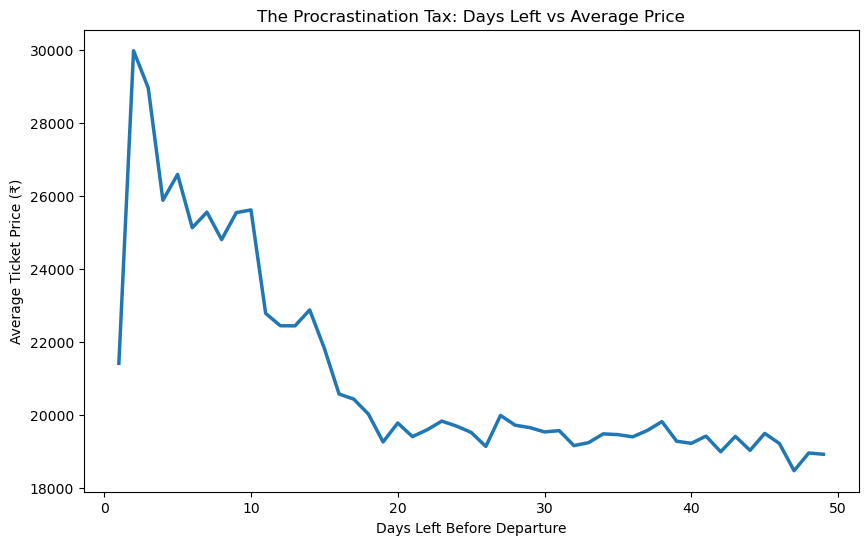

In [7]:
days_price = (
    train_df
    .groupby("days_left")["price"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.lineplot(
    data=days_price,
    x="days_left",
    y="price",
    linewidth=2.5
)

plt.title("The Procrastination Tax: Days Left vs Average Price")
plt.xlabel("Days Left Before Departure")
plt.ylabel("Average Ticket Price (₹)")
plt.show()


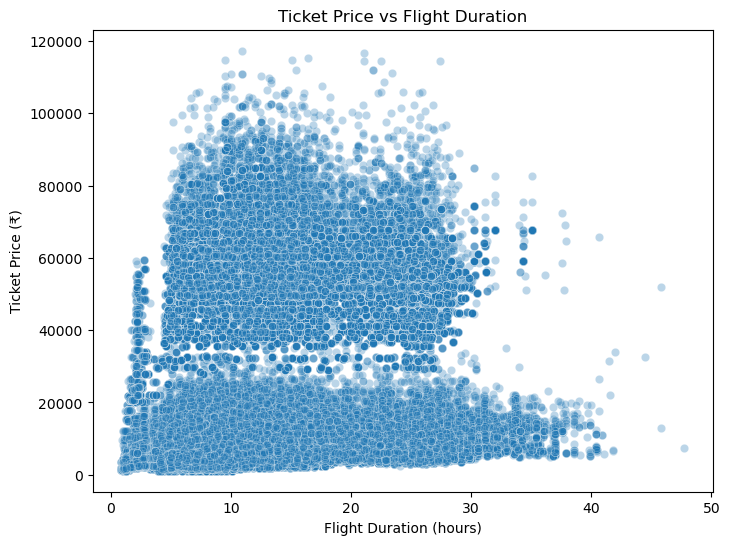

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))

sns.scatterplot(
    data=train_df,
    x="duration",
    y="price",
    alpha=0.3
)

plt.title("Ticket Price vs Flight Duration")
plt.xlabel("Flight Duration (hours)")
plt.ylabel("Ticket Price (₹)")
plt.show()


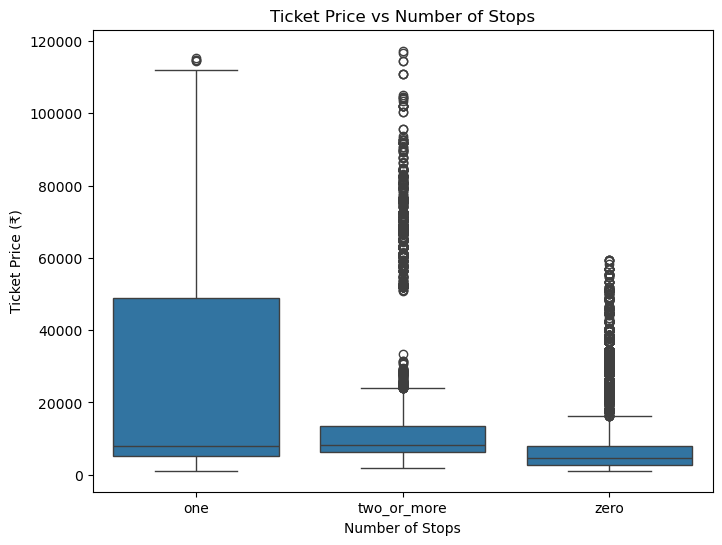

In [9]:
plt.figure(figsize=(8,6))

sns.boxplot(
    data=train_df,
    x="stops",
    y="price"
)

plt.title("Ticket Price vs Number of Stops")
plt.xlabel("Number of Stops")
plt.ylabel("Ticket Price (₹)")
plt.show()


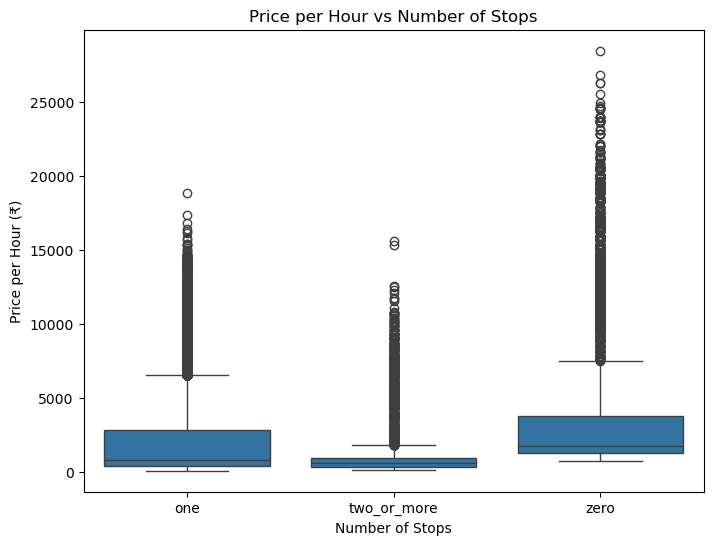

In [10]:
train_df["price_per_hour"] = train_df["price"] / train_df["duration"]

plt.figure(figsize=(8,6))

sns.boxplot(
    data=train_df,
    x="stops",
    y="price_per_hour"
)

plt.title("Price per Hour vs Number of Stops")
plt.xlabel("Number of Stops")
plt.ylabel("Price per Hour (₹)")
plt.show()


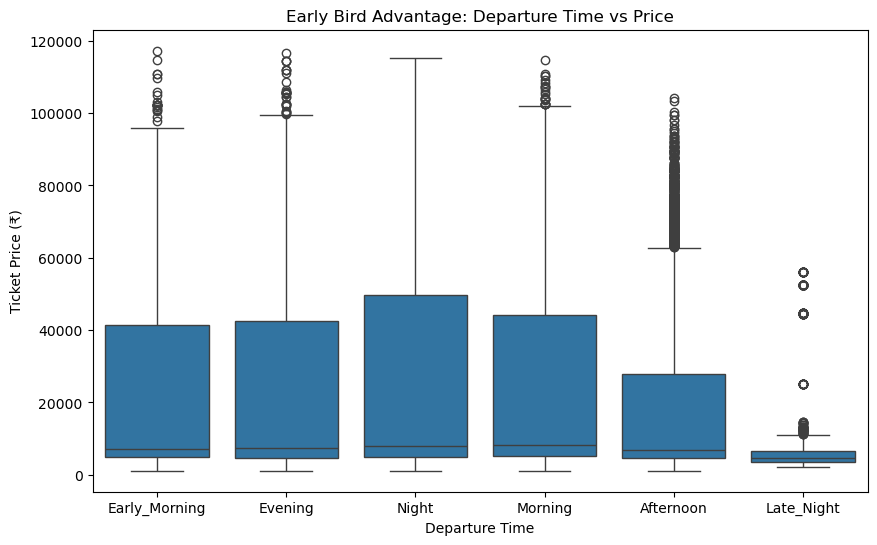

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=train_df,
    x="departure_time",
    y="price"
)

plt.title("Early Bird Advantage: Departure Time vs Price")
plt.xlabel("Departure Time")
plt.ylabel("Ticket Price (₹)")
plt.show()


In [12]:
famd_df = train_df[[
    "airline",
    "source_city",
    "destination_city",
    "departure_time",
    "arrival_time",
    "stops",
    "class",
    "duration",
    "days_left"
]]


In [13]:
!pip install prince


In [14]:
import prince


In [15]:
famd = prince.FAMD(
    n_components=2,
    n_iter=5,
    random_state=42
)

famd = famd.fit(famd_df)


In [16]:
famd_components = famd.transform(famd_df)


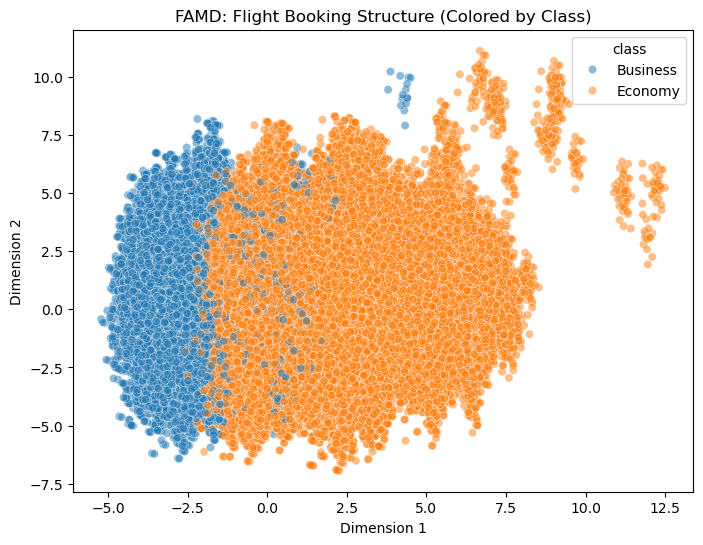

In [17]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    x=famd_components[0],
    y=famd_components[1],
    hue=train_df["class"],
    alpha=0.5
)

plt.title("FAMD: Flight Booking Structure (Colored by Class)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


In [18]:
famd.column_contributions_


component,0,1
variable,,
duration,0.035691,0.004113
airline,0.096403,0.017433
arrival_time,0.034047,0.081369
class,0.064369,0.000160
days_left,0.002323,0.008955
departure_time,0.010293,0.068421
destination_city,0.008151,0.031200
source_city,0.001066,0.042173
stops,0.024864,0.002669


In [19]:
famd.eigenvalues_


array([6.94757174, 5.35729653])

In [20]:
contrib = famd.column_contributions_
contrib


component,0,1
variable,,
duration,0.035691,0.004113
airline,0.096403,0.017433
arrival_time,0.034047,0.081369
class,0.064369,0.000160
days_left,0.002323,0.008955
departure_time,0.010293,0.068421
destination_city,0.008151,0.031200
source_city,0.001066,0.042173
stops,0.024864,0.002669


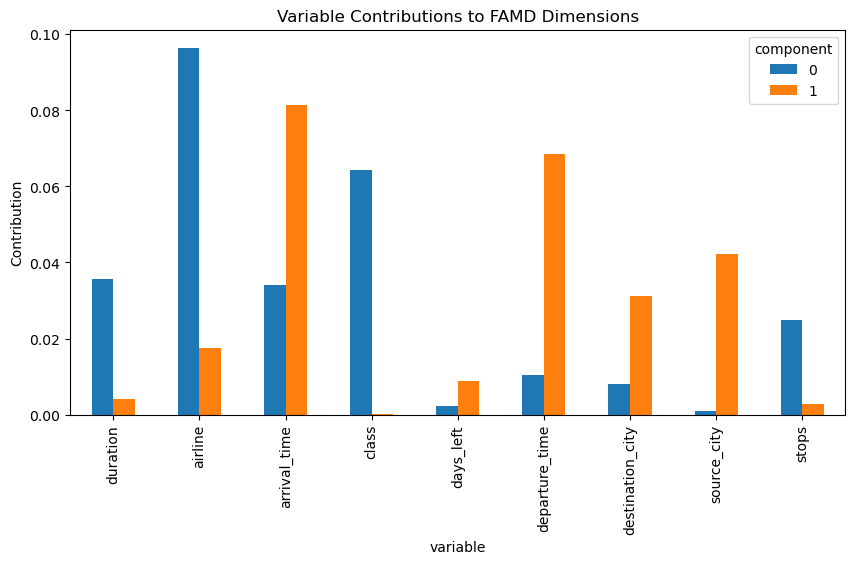

In [21]:
contrib = famd.column_contributions_

contrib.plot(
    kind="bar",
    figsize=(10,5)
)

plt.title("Variable Contributions to FAMD Dimensions")
plt.ylabel("Contribution")
plt.show()


In [22]:
famd.column_coordinates_


component,0,1
variable,,
duration,0.247964,0.022035
airline,0.669765,0.093393
arrival_time,0.236543,0.435916
class,0.447206,0.000857
days_left,0.016137,0.047973
departure_time,0.071514,0.366554
destination_city,0.056632,0.167150
source_city,0.007410,0.225932
stops,0.172746,0.014299


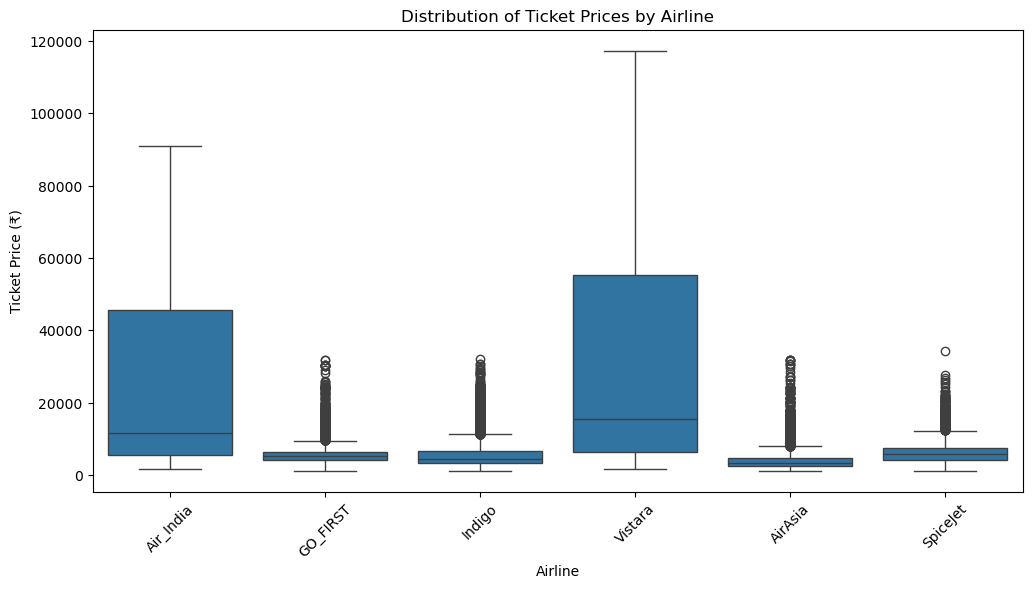

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))

sns.boxplot(
    data=train_df,
    x="airline",
    y="price"
)

plt.xticks(rotation=45)
plt.ylabel("Ticket Price (₹)")
plt.xlabel("Airline")
plt.title("Distribution of Ticket Prices by Airline")
plt.show()


In [24]:
train_df["price_per_hour"] = train_df["price"] / train_df["duration"]

avg_pph_airline = (
    train_df
    .groupby("airline")["price_per_hour"]
    .mean()
    .sort_values()
)

avg_pph_airline


airline
AirAsia       661.431267
GO_FIRST      816.911658
SpiceJet      948.157160
Indigo       1149.632174
Air_India    2147.020919
Vistara      3050.550268
Name: price_per_hour, dtype: float64

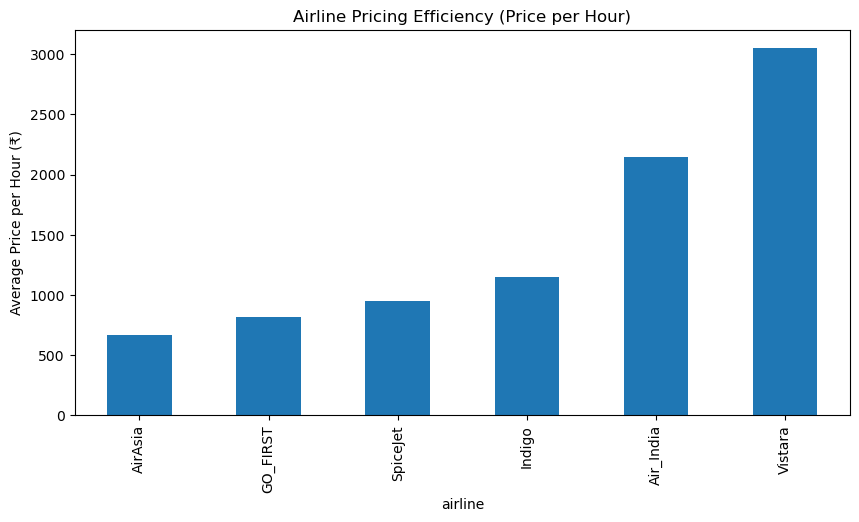

In [25]:
plt.figure(figsize=(10,5))
avg_pph_airline.plot(kind="bar")
plt.ylabel("Average Price per Hour (₹)")
plt.title("Airline Pricing Efficiency (Price per Hour)")
plt.show()


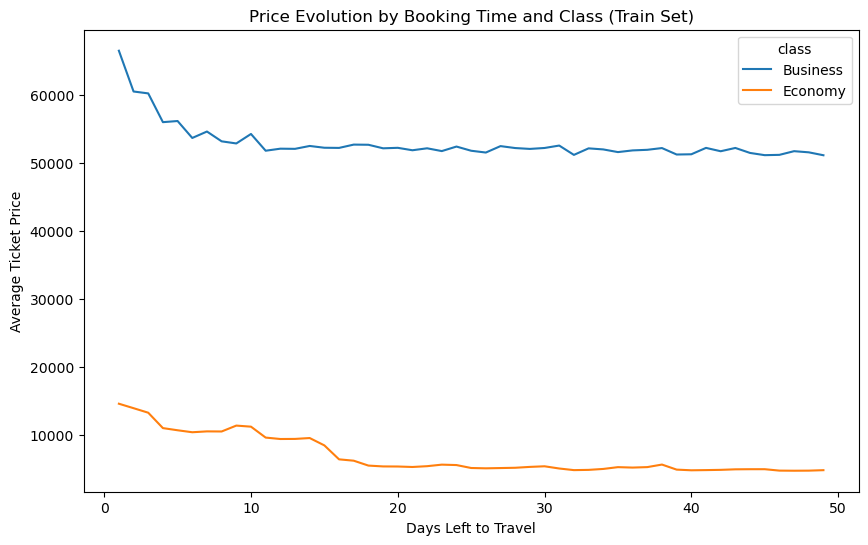

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

price_days_class = (
    train_df.groupby(['days_left', 'class'])['price']
            .mean()
            .reset_index()
)

plt.figure(figsize=(10,6))
sns.lineplot(
    data=price_days_class,
    x='days_left',
    y='price',
    hue='class'
)
plt.xlabel('Days Left to Travel')
plt.ylabel('Average Ticket Price')
plt.title('Price Evolution by Booking Time and Class (Train Set)')
plt.show()


In [27]:
# Identify top 6 most frequent routes
major_routes = (
    train_df
    .groupby(['source_city', 'destination_city'])
    .size()
    .sort_values(ascending=False)
    .head(6)
    .index
)

# Filter data to major routes
major_route_df = (
    train_df
    .set_index(['source_city', 'destination_city'])
    .loc[major_routes]
    .reset_index()
)


In [28]:
route_price_days = (
    major_route_df
    .groupby(['source_city', 'destination_city', 'days_left'])['price']
    .mean()
    .reset_index()
)


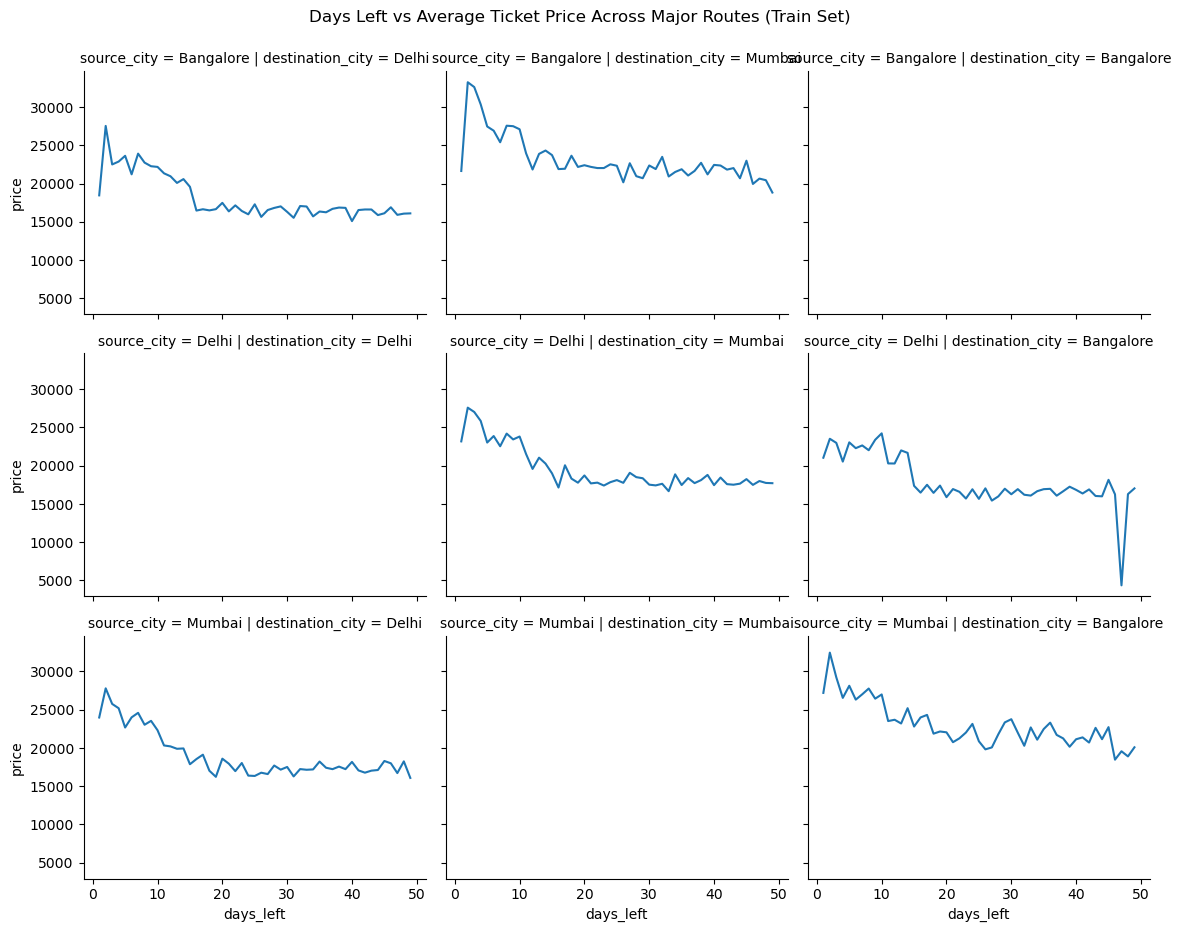

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.relplot(
    data=route_price_days,
    x='days_left',
    y='price',
    row='source_city',
    col='destination_city',
    kind='line',
    height=3,
    aspect=1.3
)

plt.suptitle(
    'Days Left vs Average Ticket Price Across Major Routes (Train Set)',
    y=1.03
)
plt.show()


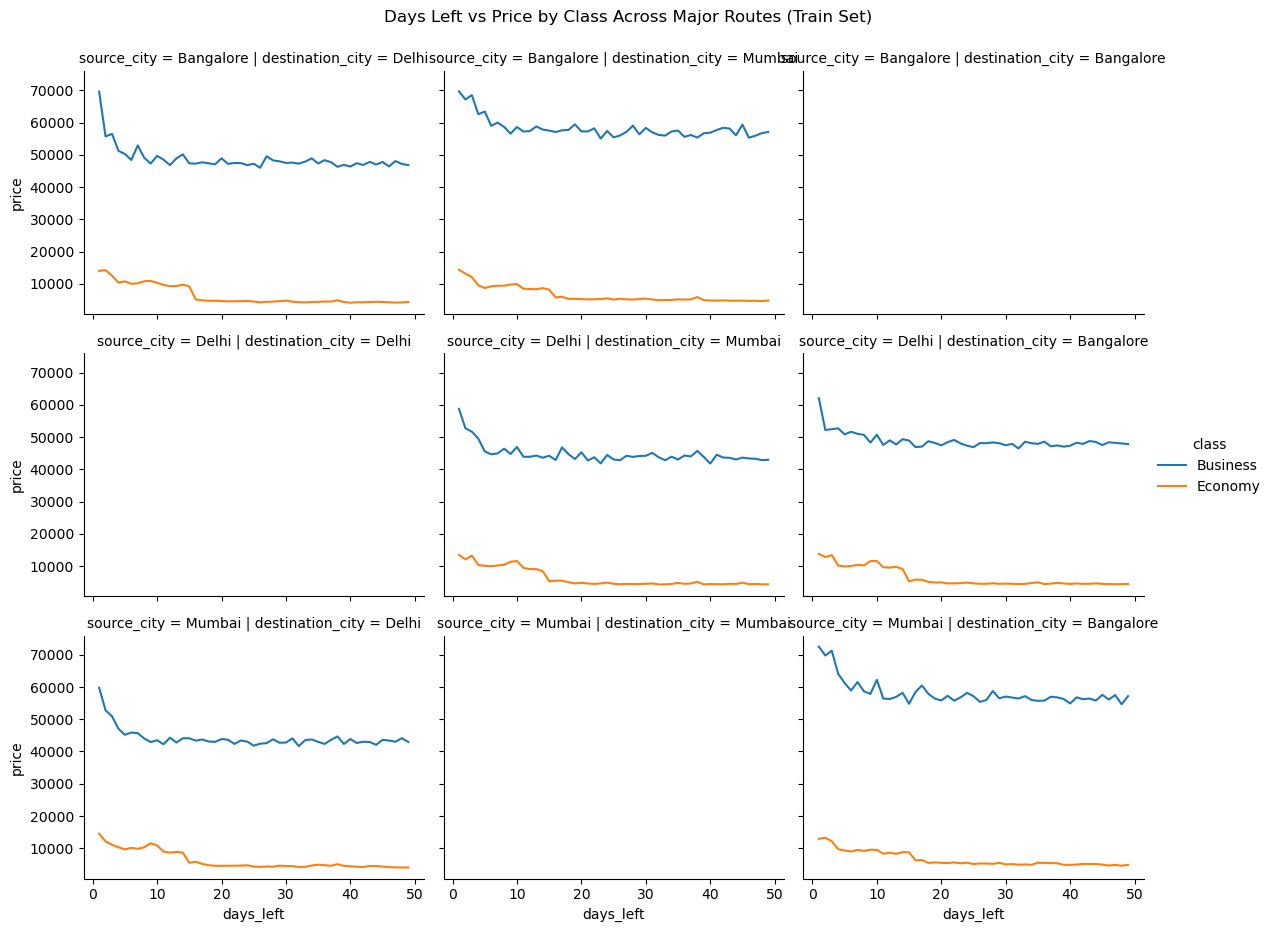

In [30]:
route_price_days_class = (
    major_route_df
    .groupby(
        ['source_city', 'destination_city', 'days_left', 'class']
    )['price']
    .mean()
    .reset_index()
)

sns.relplot(
    data=route_price_days_class,
    x='days_left',
    y='price',
    hue='class',
    row='source_city',
    col='destination_city',
    kind='line',
    height=3,
    aspect=1.3
)

plt.suptitle(
    'Days Left vs Price by Class Across Major Routes (Train Set)',
    y=1.03
)
plt.show()


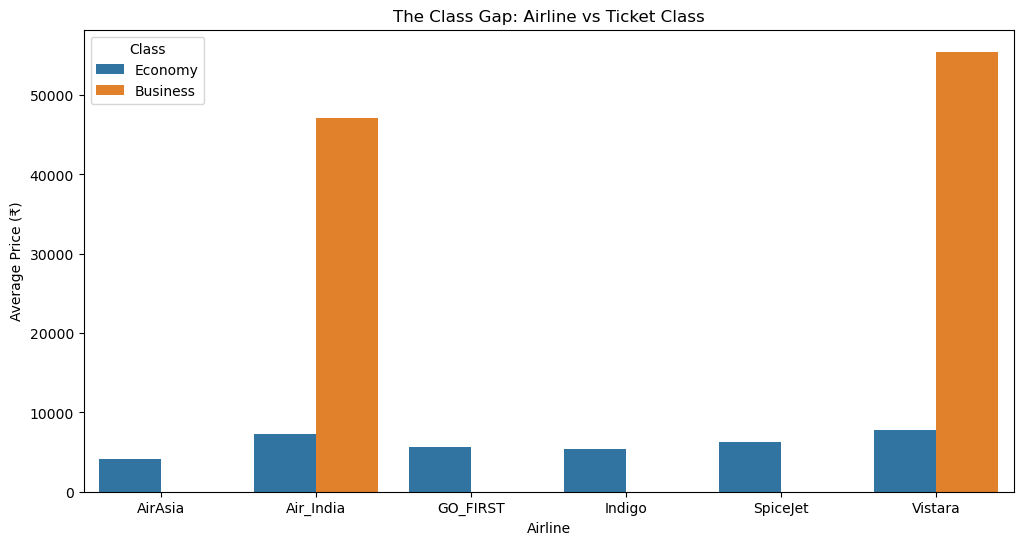

In [31]:
class_airline_price = (
    train_df
    .groupby(["airline", "class"])["price"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(12,6))
sns.barplot(
    data=class_airline_price,
    x="airline",
    y="price",
    hue="class"
)

plt.title("The Class Gap: Airline vs Ticket Class")
plt.xlabel("Airline")
plt.ylabel("Average Price (₹)")
plt.legend(title="Class")
plt.show()


In [32]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [33]:
from sklearn.cluster import KMeans

num_cols = ['price', 'duration', 'days_left']
cat_cols = ['class', 'stops', 'airline', 'departure_time']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ]
)

kmeans = KMeans(n_clusters=4, random_state=42)

pipeline = Pipeline(steps=[
    ('prep', preprocessor),
    ('cluster', kmeans)
])

pipeline


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['price', 'duration',
                                                   'days_left']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['class', 'stops', 'airline',
                                                   'departure_time'])])),
                ('cluster', KMeans(n_clusters=4, random_state=42))])

In [34]:
cluster_df = train_df.copy()
cluster_df['cluster'] = pipeline.fit_predict(train_df)


In [35]:
cluster_summary = (
    cluster_df
    .groupby('cluster')[['price', 'duration', 'days_left']]
    .mean()
    .round(1)
)

cluster_summary


,price,duration,days_left
cluster,,,
0,8617.2,22.5,24.9
1,5812.8,8.1,37.8
2,55467.1,14.7,25.8
3,9151.3,8.0,14.0


In [36]:
pd.crosstab(cluster_df['cluster'], cluster_df['class'], normalize='index')


class,Business,Economy
cluster,,
0,0.032536,0.967464
1,0.047552,0.952448
2,1.000000,0.000000
3,0.059065,0.940935


In [37]:
pd.crosstab(cluster_df['cluster'], cluster_df['stops'], normalize='index')


stops,one,two_or_more,zero
cluster,,,
0,0.915411,0.084589,0.000000
1,0.750195,0.047850,0.201955
2,0.984674,0.012568,0.002758
3,0.730002,0.049650,0.220348


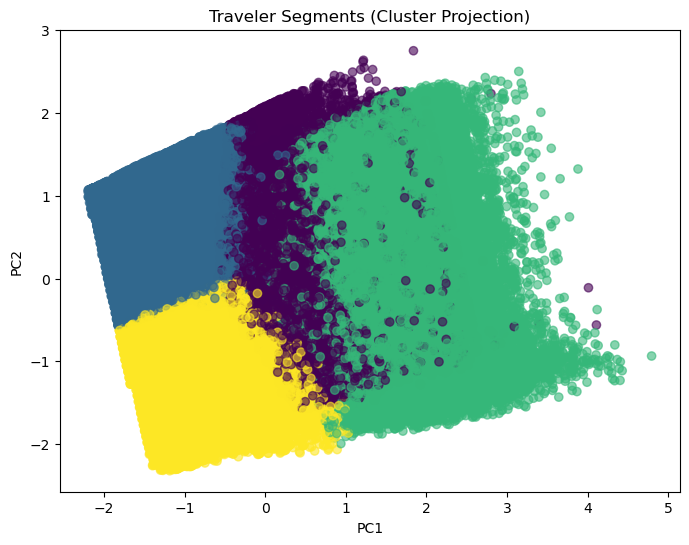

In [38]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_transformed = pipeline.named_steps['prep'].transform(train_df)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_transformed)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=cluster_df['cluster'], alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Traveler Segments (Cluster Projection)')
plt.show()


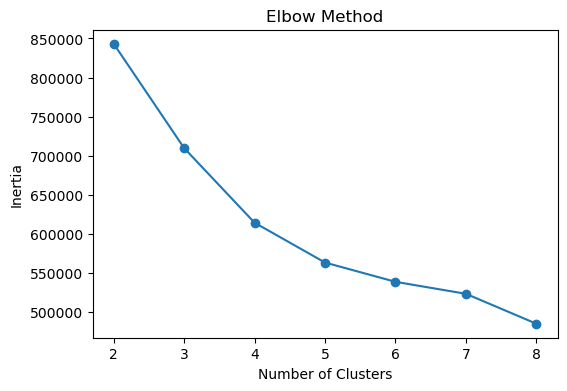

In [39]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X_transformed = pipeline.named_steps['prep'].fit_transform(train_df)

inertia = []
K = range(2, 9)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_transformed)
    inertia.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [40]:
final_kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = final_kmeans.fit_predict(X_transformed)

cluster_df = train_df.copy()
cluster_df['cluster'] = cluster_labels


In [41]:
cluster_df.groupby('cluster')[['price', 'duration', 'days_left']].mean().round(1)


,price,duration,days_left
cluster,,,
0,8617.2,22.5,24.9
1,5812.8,8.1,37.8
2,55467.1,14.7,25.8
3,9151.3,8.0,14.0


In [42]:
pd.crosstab(cluster_df['cluster'], cluster_df['class'], normalize='index')


class,Business,Economy
cluster,,
0,0.032536,0.967464
1,0.047552,0.952448
2,1.000000,0.000000
3,0.059065,0.940935


In [43]:
pd.crosstab(cluster_df['cluster'], cluster_df['stops'], normalize='index')


stops,one,two_or_more,zero
cluster,,,
0,0.915411,0.084589,0.000000
1,0.750195,0.047850,0.201955
2,0.984674,0.012568,0.002758
3,0.730002,0.049650,0.220348


In [44]:
pd.crosstab(cluster_df['cluster'], cluster_df['airline'], normalize='index')


airline,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara
cluster,,,,,,
0,0.009122,0.514501,0.007043,0.000000,0.061331,0.408004
1,0.100254,0.166816,0.142529,0.255678,0.030344,0.304379
2,0.000000,0.331113,0.000000,0.000000,0.000000,0.668887
3,0.085210,0.173275,0.125924,0.254348,0.040807,0.320436


In [45]:
from scipy.stats import kruskal

groups = [cluster_df[cluster_df['cluster']==c]['price']
          for c in cluster_df['cluster'].unique()]

kruskal(*groups)


KruskalResult(statistic=157763.44485178916, pvalue=0.0)

In [46]:
train_df['route'] = (
    train_df['source_city'] + ' → ' + train_df['destination_city']
)


In [47]:
train_df = train_df[train_df['source_city'] != train_df['destination_city']]


In [48]:
route_price = (
    train_df
    .groupby('route')['price']
    .mean()
    .sort_values(ascending=False)
)

route_price.head(10)


route
Chennai → Bangalore    24916.291028
Bangalore → Chennai    23720.098640
Kolkata → Chennai      23711.455394
Bangalore → Kolkata    23519.464792
Bangalore → Mumbai     23014.737507
Chennai → Mumbai       22926.223278
Mumbai → Chennai       22892.191589
Chennai → Kolkata      22885.676703
Mumbai → Bangalore     22862.293281
Kolkata → Bangalore    22756.440503
Name: price, dtype: float64

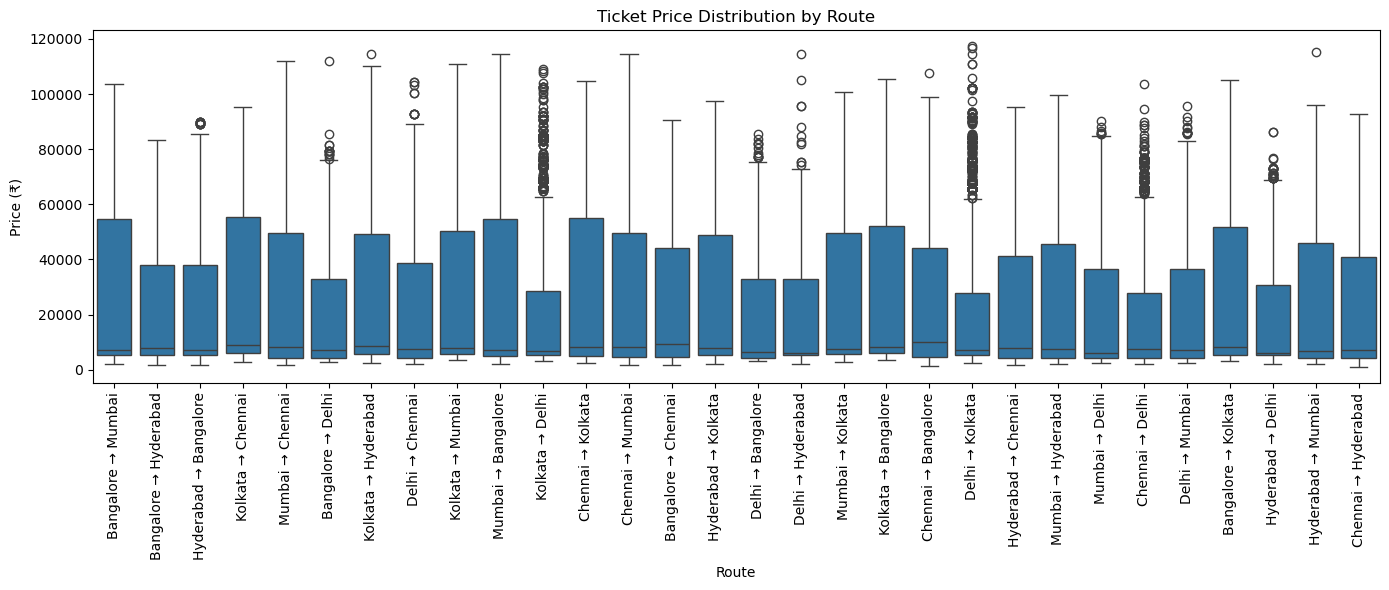

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.boxplot(
    data=train_df,
    x='route',
    y='price'
)

plt.xticks(rotation=90)
plt.title('Ticket Price Distribution by Route')
plt.xlabel('Route')
plt.ylabel('Price (₹)')
plt.tight_layout()
plt.show()


In [50]:
train_df['price_per_hour'] = train_df['price'] / train_df['duration']


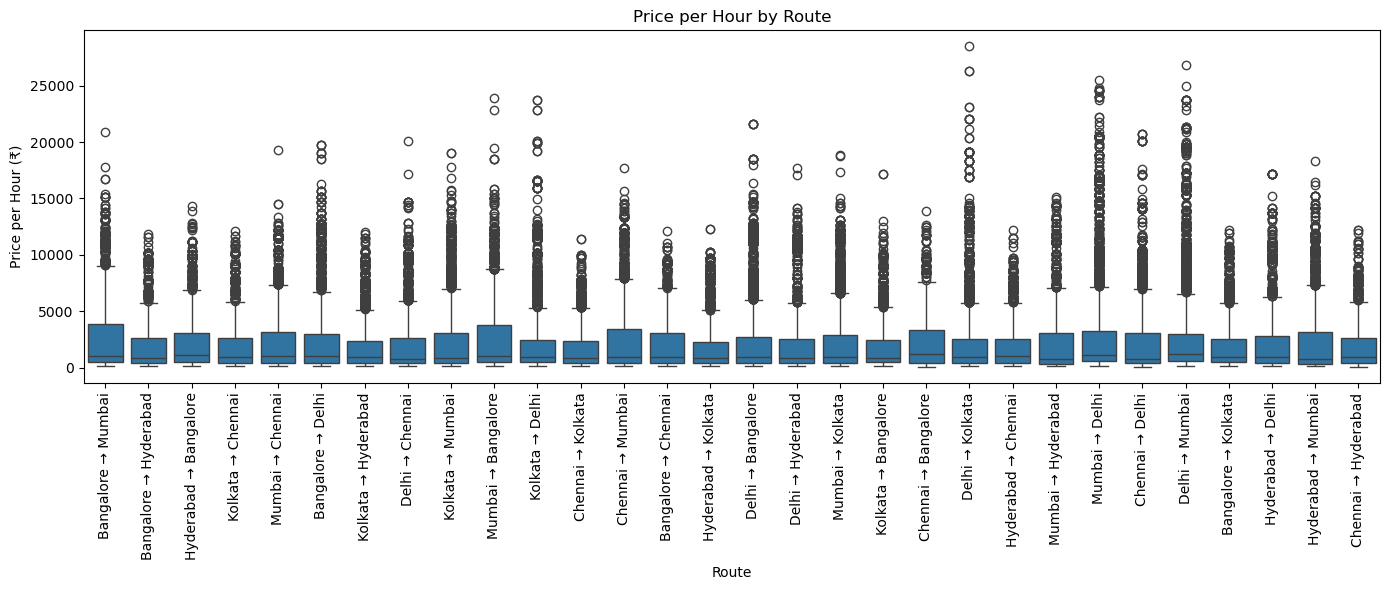

In [51]:
plt.figure(figsize=(14, 6))
sns.boxplot(
    data=train_df,
    x='route',
    y='price_per_hour'
)

plt.xticks(rotation=90)
plt.title('Price per Hour by Route')
plt.xlabel('Route')
plt.ylabel('Price per Hour (₹)')
plt.tight_layout()
plt.show()


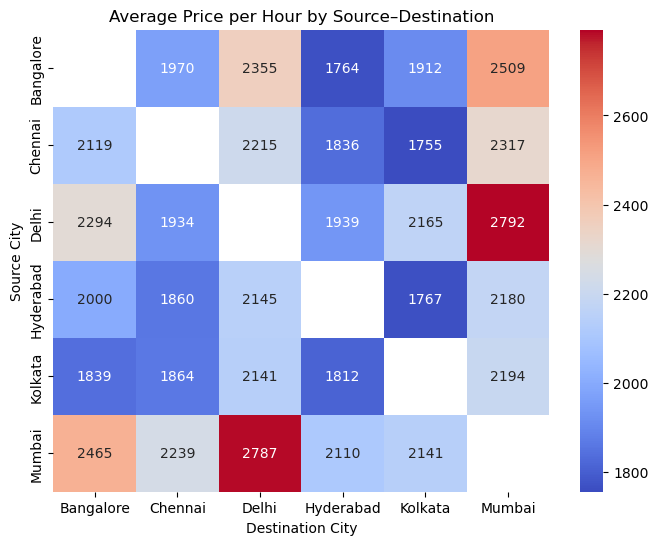

In [52]:
pivot_table = train_df.pivot_table(
    values='price_per_hour',
    index='source_city',
    columns='destination_city',
    aggfunc='mean'
)

plt.figure(figsize=(8, 6))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".0f",
    cmap='coolwarm'
)

plt.title('Average Price per Hour by Source–Destination')
plt.xlabel('Destination City')
plt.ylabel('Source City')
plt.show()


In [53]:
# Create route column
train_df['route'] = train_df['source_city'] + " → " + train_df['destination_city']

# Top 8 routes by volume
top_routes = (
    train_df['route']
    .value_counts()
    .head(8)
    .index
)

major_routes_df = train_df[train_df['route'].isin(top_routes)]


In [54]:
route_class_counts = (
    major_routes_df
    .groupby(['route', 'class'])
    .size()
    .reset_index(name='count')
)

route_class_counts


,route,class,count
0,Bangalore → Delhi,Business,3088
1,Bangalore → Delhi,Economy,7911
2,Bangalore → Mumbai,Business,3347
3,Bangalore → Mumbai,Economy,7019
4,Delhi → Bangalore,Business,3077
5,Delhi → Bangalore,Economy,8122
6,Delhi → Kolkata,Business,2580
7,Delhi → Kolkata,Economy,6887
8,Delhi → Mumbai,Business,4207
9,Delhi → Mumbai,Economy,7988


In [55]:
route_class_share = (
    route_class_counts
    .assign(
        share=lambda x: x['count'] / x.groupby('route')['count'].transform('sum')
    )
)

route_class_share


,route,class,count,share
0,Bangalore → Delhi,Business,3088,0.280753
1,Bangalore → Delhi,Economy,7911,0.719247
2,Bangalore → Mumbai,Business,3347,0.322883
3,Bangalore → Mumbai,Economy,7019,0.677117
4,Delhi → Bangalore,Business,3077,0.274757
5,Delhi → Bangalore,Economy,8122,0.725243
6,Delhi → Kolkata,Business,2580,0.272526
7,Delhi → Kolkata,Economy,6887,0.727474
8,Delhi → Mumbai,Business,4207,0.344977
9,Delhi → Mumbai,Economy,7988,0.655023


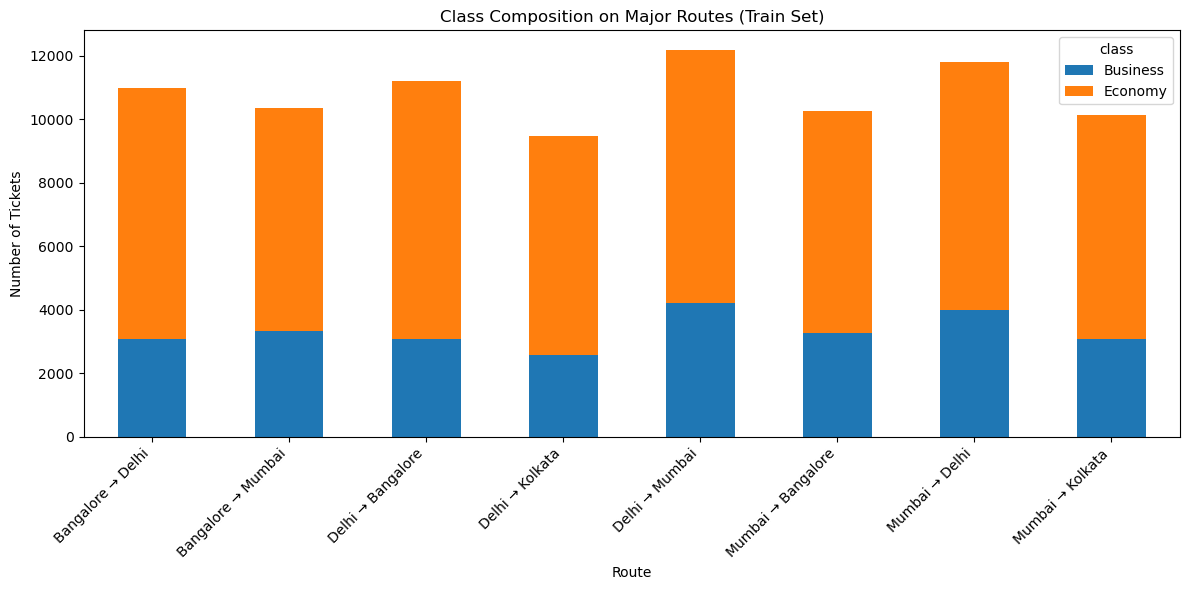

In [56]:
import matplotlib.pyplot as plt

pivot_counts = route_class_counts.pivot(
    index='route', columns='class', values='count'
)

pivot_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6)
)

plt.title('Class Composition on Major Routes (Train Set)')
plt.ylabel('Number of Tickets')
plt.xlabel('Route')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [64]:
business_share = (
    route_class_share[route_class_share['class'] == 'Business']
    .sort_values('share', ascending=False)
)

business_share


,route,class,count,share
8,Delhi → Mumbai,Business,4207,0.344977
12,Mumbai → Delhi,Business,3992,0.338506
2,Bangalore → Mumbai,Business,3347,0.322883
10,Mumbai → Bangalore,Business,3286,0.319961
14,Mumbai → Kolkata,Business,3090,0.304463
0,Bangalore → Delhi,Business,3088,0.280753
4,Delhi → Bangalore,Business,3077,0.274757
6,Delhi → Kolkata,Business,2580,0.272526


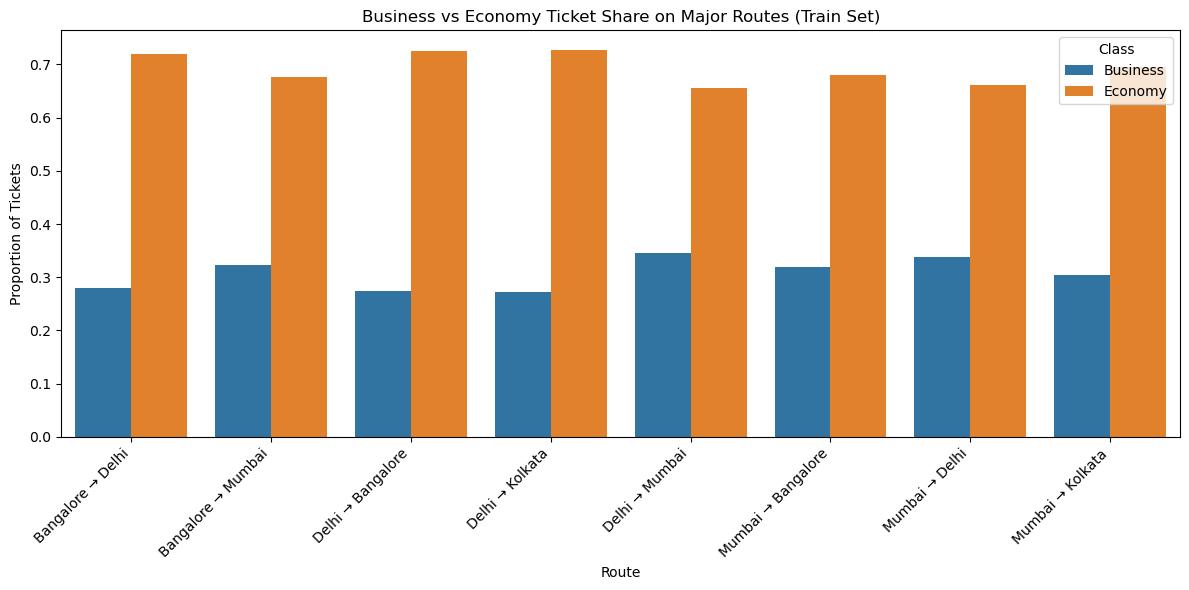

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.barplot(
    data=route_class_share,
    x='route',
    y='share',
    hue='class'
)

plt.xticks(rotation=45, ha='right')
plt.ylabel("Proportion of Tickets")
plt.xlabel("Route")
plt.title("Business vs Economy Ticket Share on Major Routes (Train Set)")
plt.legend(title='Class')
plt.tight_layout()
plt.show()


In [65]:
cluster_features = [
    'price',
    'duration',
    'days_left',
    'stops',
    'airline',
    'class',
    'source_city',
    'destination_city',
    'departure_time'
]


In [66]:
pip install kmodes


In [67]:
from kmodes.kprototypes import KPrototypes
import pandas as pd
import numpy as np

cluster_df = train_df[cluster_features].copy()


In [68]:
categorical_cols = [
    'stops',
    'airline',
    'class',
    'source_city',
    'destination_city',
    'departure_time'
]

for col in categorical_cols:
    cluster_df[col] = cluster_df[col].astype(str)


In [69]:
X = cluster_df.to_numpy()


In [70]:
cat_cols_idx = [
    cluster_df.columns.get_loc(col)
    for col in categorical_cols
]


In [71]:
kproto = KPrototypes(
    n_clusters=4,
    init='Cao',
    n_init=5,
    verbose=1,
    random_state=42
)

clusters = kproto.fit_predict(
    X,
    categorical=cat_cols_idx
)


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 34881, ncost: 8759876324962.204
Run: 1, iteration: 2/100, moves: 31709, ncost: 8232616232505.719
Run: 1, iteration: 3/100, moves: 34372, ncost: 7073345731519.975
Run: 1, iteration: 4/100, moves: 31134, ncost: 5780599608825.247
Run: 1, iteration: 5/100, moves: 18461, ncost: 5288158685946.108
Run: 1, iteration: 6/100, moves: 8496, ncost: 5155179059234.76
Run: 1, iteration: 7/100, moves: 4762, ncost: 5071661337618.061
Run: 1, iteration: 8/100, moves: 7514, ncost: 4915386190622.047
Run: 1, iteration: 9/100, moves: 5301, ncost: 4863703624362.953
Run: 1, iteration: 10/100, moves: 1129, ncost: 4862380925035.461
Run: 1, iteration: 11/100, moves: 112, ncost: 4862366749519.622
Run: 1, iteration: 12/100, moves: 37, ncost: 4862365632391.926
Run: 1, iteration: 13/100, moves: 3, ncost: 4862365609343.573
Run: 1, it

In [72]:
cluster_df['cluster'] = clusters


In [73]:
cluster_summary = (
    cluster_df
    .groupby('cluster')[['price', 'duration', 'days_left']]
    .mean()
)

cluster_summary


,price,duration,days_left
cluster,,,
0,64518.332332,14.194921,24.681293
1,19617.253006,11.461075,14.927705
2,48191.262581,14.958094,26.446202
3,5791.906233,11.253442,27.544104


In [74]:
pd.crosstab(
    cluster_df['cluster'],
    cluster_df['class'],
    normalize='index'
)


class,Business,Economy
cluster,,
0,1.000000,0.000000
1,0.341331,0.658669
2,0.999798,0.000202
3,0.000321,0.999679


In [75]:
pd.crosstab(
    cluster_df['cluster'],
    cluster_df['stops'],
    normalize='index'
)


stops,one,two_or_more,zero
cluster,,,
0,0.971773,0.027668,0.000559
1,0.596419,0.115130,0.288451
2,0.973942,0.001163,0.024896
3,0.804988,0.049954,0.145057


In [76]:
pd.crosstab(
    cluster_df['cluster'],
    cluster_df['airline'],
    normalize='index'
)


airline,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara
cluster,,,,,,
0,0.000000,0.146480,0.000000,0.000000,0.000000,0.853520
1,0.015823,0.413991,0.025712,0.066465,0.016968,0.461042
2,0.000000,0.469733,0.000000,0.000000,0.000025,0.530241
3,0.082734,0.222788,0.117752,0.217563,0.044631,0.314532


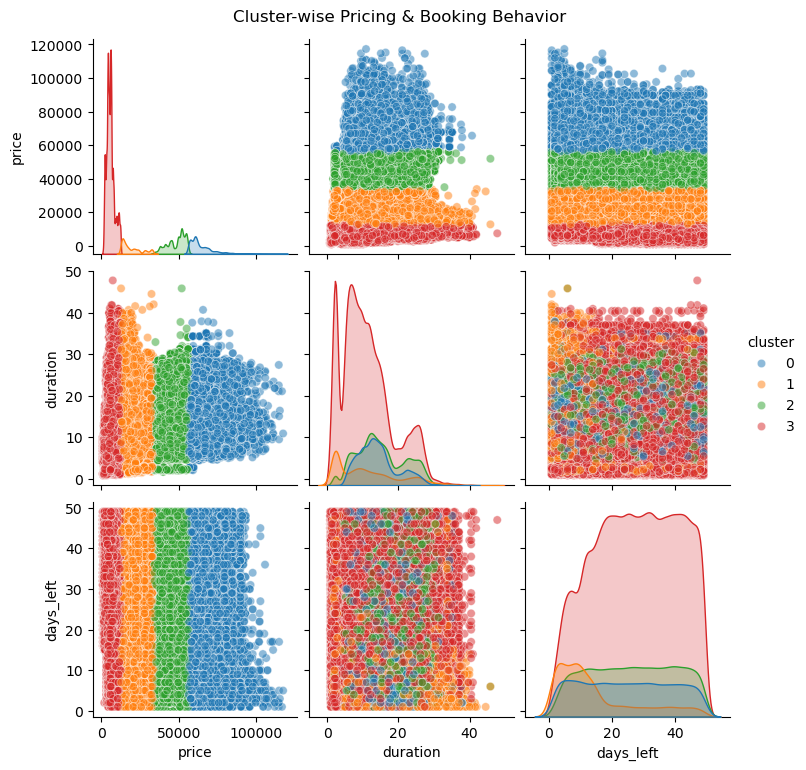

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(
    cluster_df,
    vars=['price', 'duration', 'days_left'],
    hue='cluster',
    palette='tab10',
    plot_kws={'alpha': 0.5}
)

plt.suptitle("Cluster-wise Pricing & Booking Behavior", y=1.02)
plt.show()


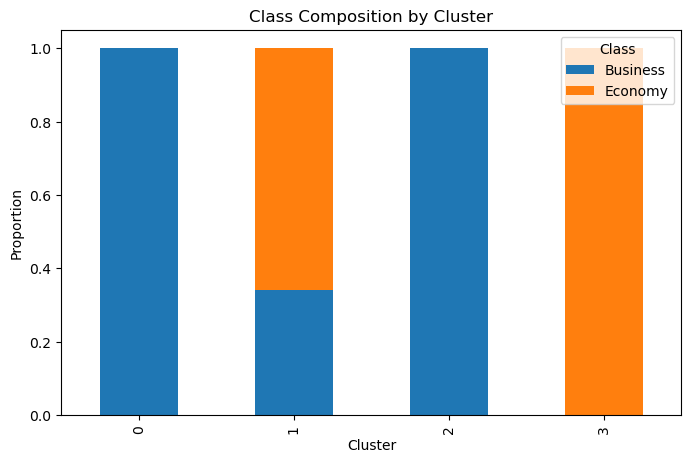

In [78]:
(pd.crosstab(cluster_df['cluster'], cluster_df['class'], normalize='index')
 .plot(kind='bar', stacked=True, figsize=(8,5)))

plt.title("Class Composition by Cluster")
plt.ylabel("Proportion")
plt.xlabel("Cluster")
plt.legend(title="Class")
plt.show()


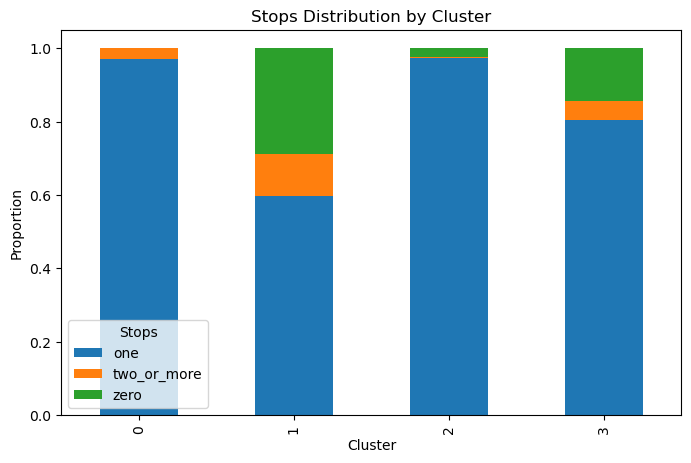

In [79]:
(pd.crosstab(cluster_df['cluster'], cluster_df['stops'], normalize='index')
 .plot(kind='bar', stacked=True, figsize=(8,5)))

plt.title("Stops Distribution by Cluster")
plt.ylabel("Proportion")
plt.xlabel("Cluster")
plt.legend(title="Stops")
plt.show()


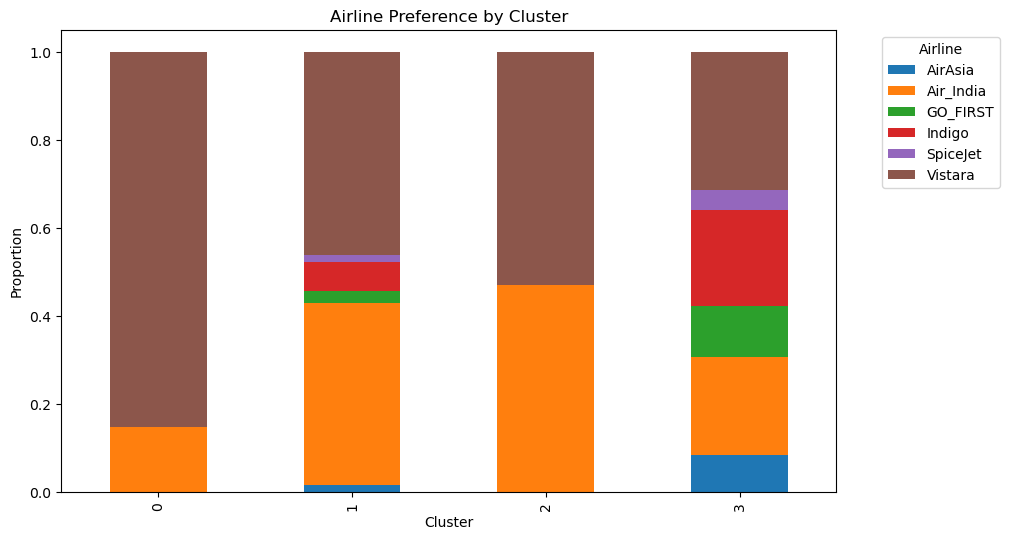

In [80]:
(pd.crosstab(cluster_df['cluster'], cluster_df['airline'], normalize='index')
 .plot(kind='bar', stacked=True, figsize=(10,6)))

plt.title("Airline Preference by Cluster")
plt.ylabel("Proportion")
plt.xlabel("Cluster")
plt.legend(bbox_to_anchor=(1.05,1), title="Airline")
plt.show()


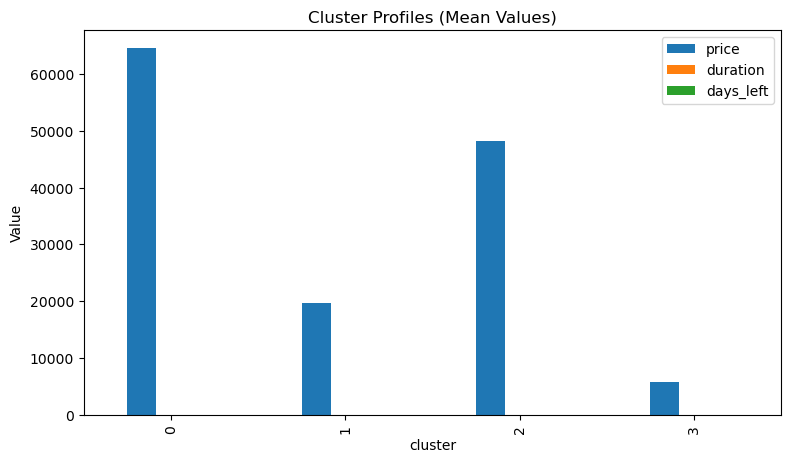

In [81]:
cluster_profile = (
    cluster_df
    .groupby('cluster')[['price','duration','days_left']]
    .mean()
)

cluster_profile.plot(kind='bar', figsize=(9,5))
plt.title("Cluster Profiles (Mean Values)")
plt.ylabel("Value")
plt.show()


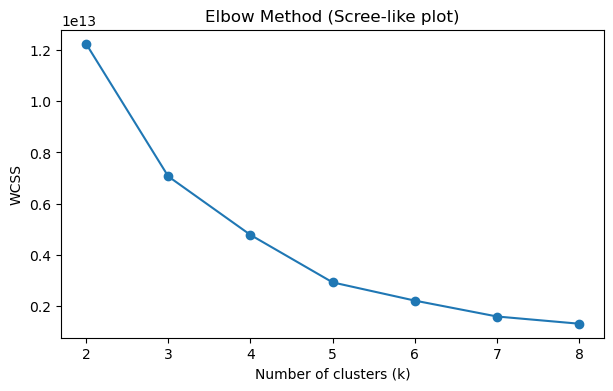

In [83]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = train_df[['price', 'duration', 'days_left']]

wcss = []
K = range(2, 9)

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    wcss.append(km.inertia_)

plt.figure(figsize=(7,4))
plt.plot(K, wcss, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method (Scree-like plot)")
plt.show()


In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import prince


In [86]:
df = train_df.copy()


In [87]:
famd_vars = [
    'price',
    'duration',
    'days_left',
    'airline',
    'class',
    'stops',
    'source_city',
    'destination_city',
    'departure_time',
    'arrival_time'
]

famd_df = df[famd_vars]


In [88]:
famd_df = famd_df.sample(n=10000, random_state=42)


In [89]:
famd = prince.FAMD(
    n_components=5,
    n_iter=5,
    random_state=42
)

famd = famd.fit(famd_df)


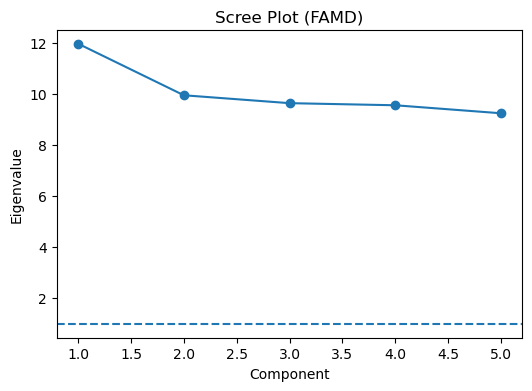

In [90]:
eigenvalues = famd.eigenvalues_

plt.figure(figsize=(6,4))
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, marker='o')
plt.axhline(1, linestyle='--')
plt.xlabel("Component")
plt.ylabel("Eigenvalue")
plt.title("Scree Plot (FAMD)")
plt.show()


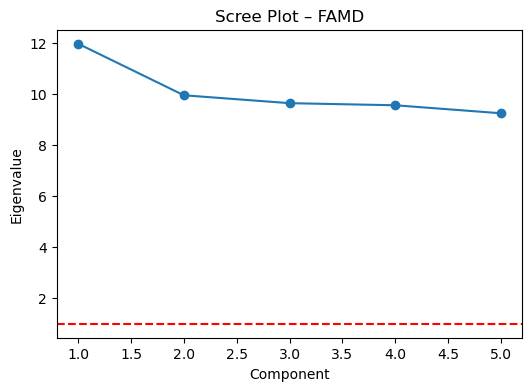

In [95]:
eigenvalues = famd.eigenvalues_

plt.figure(figsize=(6,4))
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, marker='o')
plt.axhline(1, linestyle='--', color='red')
plt.xlabel("Component")
plt.ylabel("Eigenvalue")
plt.title("Scree Plot – FAMD")
plt.show()


In [102]:
famd_df = train_df[
    [
        'price',
        'duration',
        'days_left',
        'airline',
        'source_city',
        'destination_city',
        'stops',
        'class'
    ]
]


In [103]:
famd_train = famd_df.sample(
    n=4000,     # 3k–5k is enough
    random_state=42
)


In [104]:
import prince

famd = prince.FAMD(
    n_components=5,
    n_iter=5,
    random_state=42
)

famd = famd.fit(famd_train)


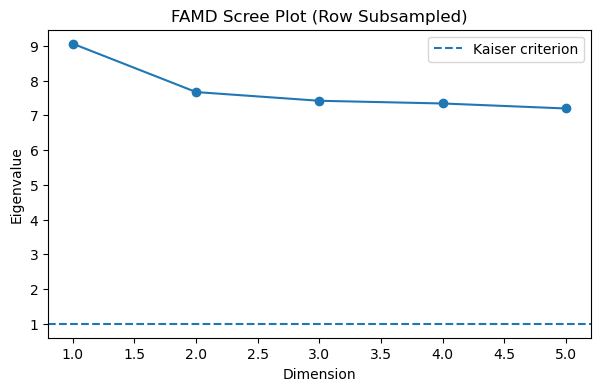

In [105]:
eigenvalues = famd.eigenvalues_

plt.figure(figsize=(7,4))
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, marker='o')
plt.axhline(1, linestyle='--', label='Kaiser criterion')
plt.xlabel("Dimension")
plt.ylabel("Eigenvalue")
plt.title("FAMD Scree Plot (Row Subsampled)")
plt.legend()
plt.show()


In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import prince

famd_df = train_df[
    [
        'price',
        'duration',
        'days_left',
        'airline',
        'source_city',
        'destination_city',
        'stops',
        'class'
    ]
]


In [109]:
famd_train = famd_df.sample(
    n=4000,          # enough to stabilize structure
    random_state=42
)


In [110]:
famd = prince.FAMD(
    n_components=2,
    n_iter=5,
    random_state=42
)

famd = famd.fit(famd_train)


In [111]:
eig = famd.eigenvalues_
pd.Series(eig, index=['Dim 1', 'Dim 2'])


Dim 1    8.742453
Dim 2    7.767904
dtype: float64

In [116]:
famd = famd.fit(famd_train)


In [117]:
var_coords = famd.column_coordinates_
var_coords


component,0,1
variable,,
duration,0.237629,0.016686
airline,0.609691,0.023216
class,0.524826,0.006385
days_left,0.075798,0.119802
destination_city,0.037201,0.542697
price,0.979721,0.967578
source_city,0.060102,0.529301
stops,0.195267,0.056541


In [118]:
var_contrib = var_coords**2
var_contrib = var_contrib.div(var_contrib.sum(axis=0), axis=1)
var_contrib


component,0,1
variable,,
duration,0.032976,0.000182
airline,0.217083,0.000352
class,0.160856,0.000027
days_left,0.003355,0.009385
destination_city,0.000808,0.192585
price,0.560545,0.612183
source_city,0.002110,0.183195
stops,0.022267,0.002090


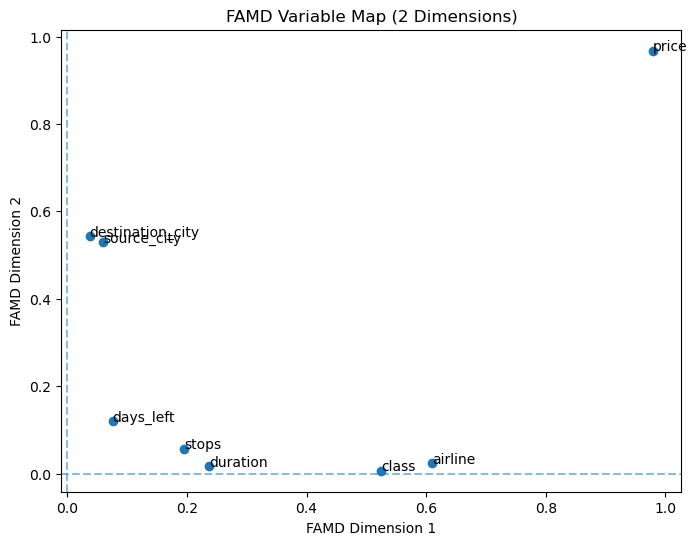

In [119]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(var_coords[0], var_coords[1])

for i, txt in enumerate(var_coords.index):
    plt.text(var_coords.iloc[i,0], var_coords.iloc[i,1], txt)

plt.axhline(0, linestyle='--', alpha=0.5)
plt.axvline(0, linestyle='--', alpha=0.5)

plt.xlabel("FAMD Dimension 1")
plt.ylabel("FAMD Dimension 2")
plt.title("FAMD Variable Map (2 Dimensions)")
plt.show()


In [125]:
train_df['stops'] = train_df['stops'].astype('category')


In [126]:
import statsmodels.formula.api as smf

model_interaction = smf.ols(
    'price ~ duration * stops',
    data=train_df
).fit()

print(model_interaction.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     3124.
Date:                Sat, 03 Jan 2026   Prob (F-statistic):               0.00
Time:                        07:42:26   Log-Likelihood:            -2.7415e+06
No. Observations:              240122   AIC:                         5.483e+06
Df Residuals:                  240116   BIC:                         5.483e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

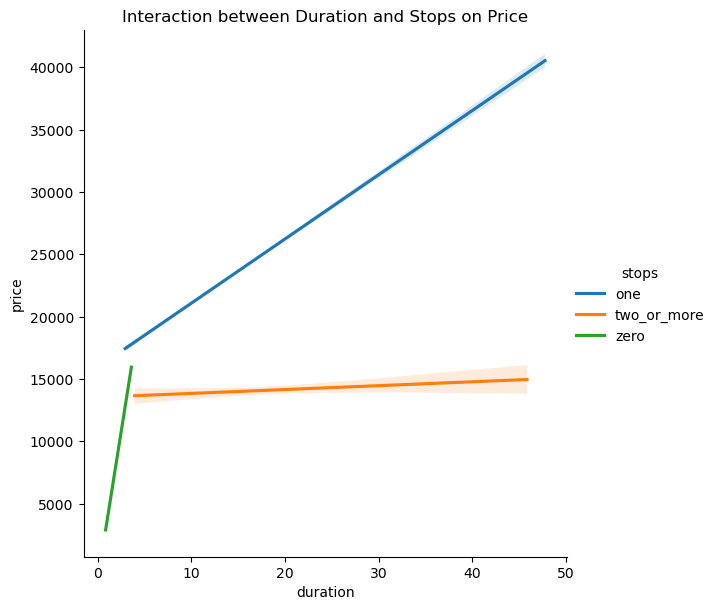

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(
    data=train_df,
    x='duration',
    y='price',
    hue='stops',
    scatter=False,
    height=6
)

plt.title("Interaction between Duration and Stops on Price")
plt.show()
